# Projet 6: Classifiez automatiquement des biens de consommation

## Analyse textuelle - NLP.

### Sommaire

- <a href="#C2">Importation et analyse exploratoire du jeu de données</a>

- <a href="#C3">prétraitement de données textuelles</a>

    - <a href="#C31">preprocessing</a>

    - <a href="#C32">wordcloud</a>

- <a href="#C4">Fonctions communes: TSNE, Kmeans, ARI et présentation graphique</a>

- <a href="#C5">BAG OF WORDS -- TF-IDF</a>

    - <a href="#C51">Préparation sentences</a>

    - <a href="#C52">Exécution du modèle </a>

    - <a href="#C53">Visualisation </a>

- <a href="#C6">WORD2VEC</a>
   
    - <a href="#C61">Setup</a>

    - <a href="#C62">Création du modèle Word2Vec </a>

    - <a href="#C63">Création de la matrice d'Embedding</a>

    - <a href="#C64">Création de la modèle d'Embedding</a>

    - <a href="#C65">Exécution du modèle </a>

    - <a href="#C66">Visualisation </a>

- <a href="#C7">GLOVE</a>

    - <a href="#C71">Setup</a>

    - <a href="#C72">Création du modèle GloVe </a>

    - <a href="#C73">Création de la matrice d'Embedding</a>

    - <a href="#C74">Création de la modèle d'Embedding</a>

    - <a href="#C75">Exécution du modèle </a>

    - <a href="#C76">Visualisation </a>

- <a href="#C8">BERT - Bidirectional Encoder Representations from Transformers</a>

    - <a href="#C81">Setup</a>

    - <a href="#C82">Functions pour BERT </a>

    - <a href="#C83">Création et Exécution du modèle </a>

    - <a href="#C84">Visualisation </a>

- <a href="#C9">USE - Universal Sentence Encoder</a>

    - <a href="#C91">Création et Exécution du modèle </a>

    - <a href="#C92">Visualisation </a>

# <a name="C2">Importation et analyse exploratoire du jeu de données</a>

# Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string

import spacy

import nltk
from nltk.tokenize import wordpunct_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

import wordcloud
from wordcloud import WordCloud
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import adjusted_rand_score 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from sklearn import manifold
from sklearn import decomposition

# Style use.
sns.set_style('darkgrid')
plt.style.use('ggplot')

2022-07-18 11:03:14.108434: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-18 11:03:14.111357: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-18 11:03:14.111366: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
pd.options.display.max_columns=100

In [3]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data

In [4]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

In [5]:
df.shape

(1050, 15)

# EDA

In [6]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [7]:
df['product_name'][0]

'Elegance Polyester Multicolor Abstract Eyelet Door Curtain'

In [157]:
df['product_category_tree'][8][2:-2]

'Watches >> Wrist Watches >> Alfajr Wrist Watches'

In [150]:
df['description'][8]

"Alfajr WY16B Youth Digital Watch  - For Men, Boys - Buy Alfajr WY16B Youth Digital Watch  - For Men, Boys  WY16B Online at Rs.4995 in India Only at Flipkart.com. Azan Times ( For All Cities Around The World ), Prayer Reminders, Qibla Direction, Hijri And Gregorian Calnedars, Qur'An Bookmark, Daily Alrams - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!"

In [10]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [11]:
df['product_category_tree'][0].split()

['["Home',
 'Furnishing',
 '>>',
 'Curtains',
 '&',
 'Accessories',
 '>>',
 'Curtains',
 '>>',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Do..."]']

In [12]:
df['product_category_tree'][0][2:-2].split(sep='>>')

['Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do...']

In [13]:
str.split(df['product_category_tree'][0][2:-2], '>>')

['Home Furnishing ',
 ' Curtains & Accessories ',
 ' Curtains ',
 ' Elegance Polyester Multicolor Abstract Eyelet Do...']

In [14]:
def get_category_lvl(tree, level=1):
    '''this function return the category level.
    
    parameters:
        tree: the category tree for one product
        level: the level in the category tree between 1 and 3
        
    return:
        the category level asking for
    '''
    lvl = ''
    i=0
    for categ in tree[2:-2].split(sep='>>'):
        lvl=categ
        i+=1
        if i==level:
            break
    return lvl    

In [15]:
get_category_lvl(df['product_category_tree'][2], level=1)

'Baby Care '

In [16]:
df['product_category_level_1'] = df['product_category_tree'].apply(lambda x: get_category_lvl(x, level=1))
df['product_category_level_2'] = df['product_category_tree'].apply(lambda x: get_category_lvl(x, level=2))
df['product_category_level_3'] = df['product_category_tree'].apply(lambda x: get_category_lvl(x, level=3))

In [153]:
df[7:8]

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,product_category_level_1,product_category_level_2,product_category_level_3
7,dd0e3470a7e6ed76fd69c2da27721041,2015-12-04 07:25:36 +0000,http://www.flipkart.com/t-star-uft-tsw-005-bk-...,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,"[""Watches >> Wrist Watches >> T STAR Wrist Wat...",WATECFFVGFZPAD3D,999.0,399.0,dd0e3470a7e6ed76fd69c2da27721041.jpg,False,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Chronograp...",Watches,Wrist Watches,T STAR Wrist Watches


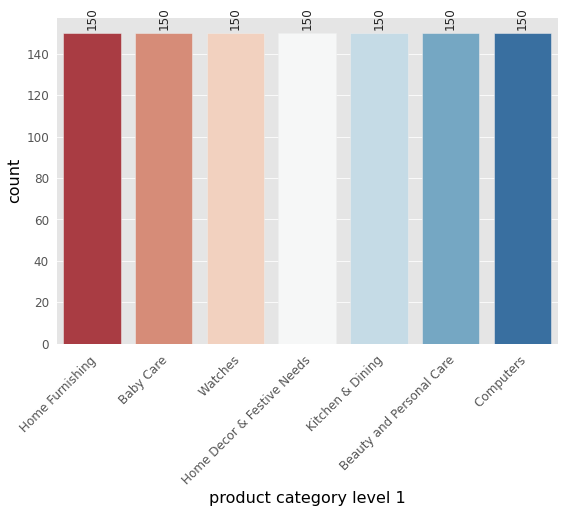

In [18]:
vbars = df['product_category_level_1'].value_counts().values

plt.figure(figsize=(9, 6))
sns.countplot(x='product_category_level_1',
              data=df,
              palette='RdBu'
             )
plt.xlabel('product category level 1', fontsize=16, c='black')
plt.xticks(fontsize=12, rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('count', fontsize=16, c='black')
plt.yticks(fontsize=12)

for i in range(7):
    plt.annotate(text=vbars[i], xy=(i, vbars[i]+3), fontsize=12, rotation=90, ha='center')

plt.show()

In [19]:
df['product_category_level_2'].value_counts().count()

63

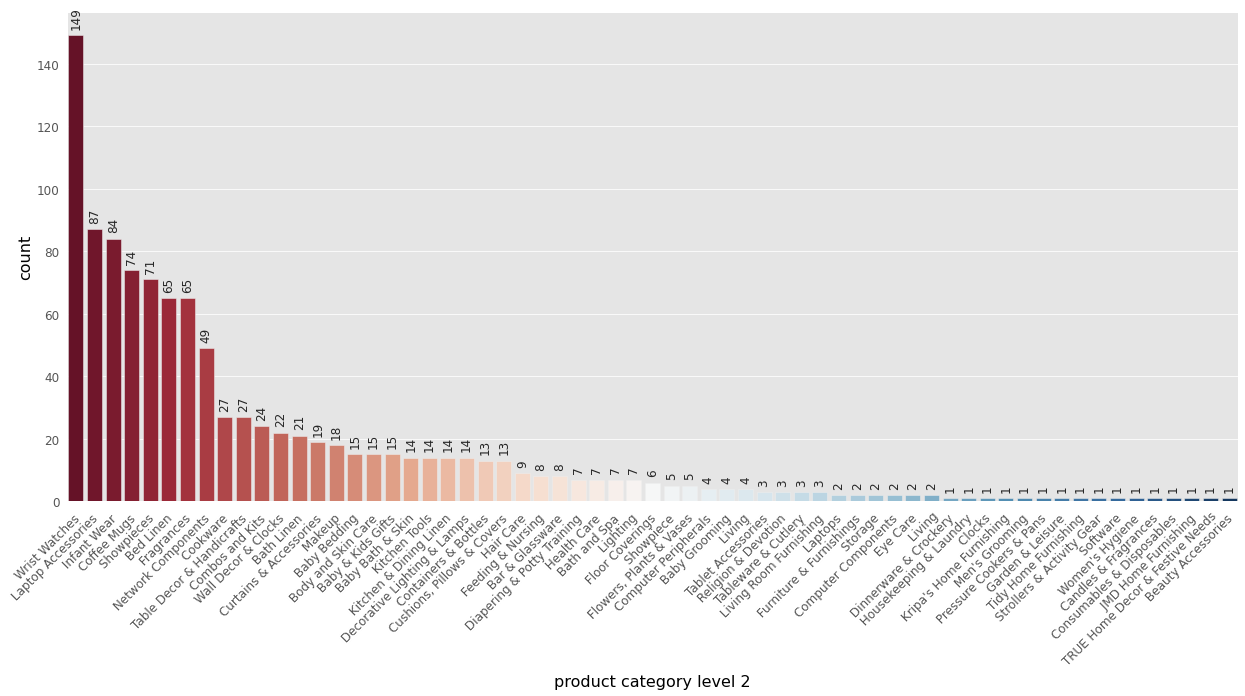

In [20]:
vbars = df['product_category_level_2'].value_counts().values

plt.figure(figsize=(21, 9))
sns.countplot(x='product_category_level_2',
              data=df,
              order=df['product_category_level_2'].value_counts().index,
              palette='RdBu')
plt.xlabel('product category level 2', fontsize=16, c='black')
plt.xticks(fontsize=12, rotation=45, ha='right', rotation_mode='anchor')
plt.ylabel('count', fontsize=16, c='black')
plt.yticks(fontsize=12)

for i in range(63):
    plt.annotate(text=vbars[i], xy=(i, vbars[i]+3), fontsize=12, rotation=90, ha='center')

plt.show()

In [21]:
data_1 = df[['product_category_level_1', 'description', 'image']]

In [22]:
data_1 = data_1.rename(columns={'product_category_level_1':'category'})

In [23]:
data_1.head(1)

,category,description,image
0,Home Furnishing,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg


In [24]:
data_1.to_csv('data.csv', index=False)

In [25]:
data = df[['product_category_level_1', 'description']]

In [26]:
data.head(1)

,product_category_level_1,description
0,Home Furnishing,Key Features of Elegance Polyester Multicolor ...


In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
data['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

# <a name="C3">Prétraitement de données textuelles</a>

## <a name="C31">Preprocessing</a> 

In [29]:
def preprocess_nltk(sentence):
    '''this function aim to clean the description and prepare it for classification.
    principally it will move the punctuation, digits, makes word lowercase, lemmatize,
    
    parmeters:
        sentence: original sentence of product descrption
        
    returns:
        clean_sentence: sentence after preprocessing
    '''
    tokens = wordpunct_tokenize(sentence)
    
    stopwords = nltk.corpus.stopwords.words('english') + ['.,']
    tokens_without_stopwords = [token.lower() for token in tokens if token not in stopwords]

    tokens_without_punctuation = [token for token in tokens_without_stopwords if token not in string.punctuation]

    tokens_without_digit = [token for token in tokens_without_punctuation if not token.isdigit() and len(token)>2]
    
    tokens_lemmatized = [WordNetLemmatizer().lemmatize(token) for token in tokens_without_digit]

    words = set(nltk.corpus.words.words())
    clean_sentence = ' '.join(token for token in tokens_lemmatized if token in words)
    
    return clean_sentence

In [30]:
nlp = spacy.load("en_core_web_sm")
def preprocess_spacy(sentence):
    doc = nlp(sentence)

    clean_sentence = ' '.join((token.lemma_).lower() for token in doc if not (token.is_stop or token.is_punct or token.is_digit) and len(token)>2)
    return clean_sentence    

In [31]:
%%time
data['description_clean_1'] = data.description.apply(lambda x : preprocess_spacy(x))

CPU times: user 9.69 s, sys: 0 ns, total: 9.69 s
Wall time: 9.69 s


In [32]:
%%time
data['description_clean'] = data.description.apply(lambda x : preprocess_nltk(x))

CPU times: user 50.5 s, sys: 2.62 s, total: 53.1 s
Wall time: 53.1 s


In [33]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')', '.,']

def stop_word_filter_fct(list_words) :
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    word_tokens = tokenizer_fct(desc_text)
#    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

data['description_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['description_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data['description_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))
data.shape

(1050, 7)

In [176]:
data.description[1]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel'

In [35]:
data.description_clean[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price this curtain look interior this curtain made high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving this curtain ant wrinkle anti shrinkage elegant give home bright modernistic appeal design the attention sure steal heart these contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlight specification elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed for door type eyelet model name abstract polyester door curtain set model color multicolor dimension length box number content sale package pack 

In [36]:
data.description_clean_1[0]

'key features elegance polyester multicolor abstract eyelet door curtain floral curtain elegance polyester multicolor abstract eyelet door curtain height pack price curtain enhance look interior curtain high quality polyester fabric feature eyelet style stitch metal ring make room environment romantic loving curtain ant- wrinkle anti shrinkage elegant apparance home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart thing morning welcome bright sun ray want wish good morning world draw close evening create special moment joyous beauty give soothe print bring home elegant curtain softly filter light room right sunlight ,specifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance design door type eyelet model abstract polyester door curtain set model duster25 color multicolor dimensions length box number contents sales package pack sales package curtains body de

In [175]:
data.description_bow_lem[1]

'specification sathiyas cotton bath towel bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men woman boy girl model asvtwl322 color red yellow blue size mediam dimension length inch width inch box number content sale package sale package bath towel'

In [172]:
len(data['description'][1].split())

74

In [39]:
len(data['description_clean'][0].split())

149

In [40]:
len(data['description_clean_1'][0].split())

140

In [41]:
len(data['description_bow'][0].split())

155

In [173]:
len(data['description_bow_lem'][1].split())

63

In [43]:
len(data['description_dl'][0].split())

247

In [174]:
data.description_dl[1]

'specifications of sathiyas cotton bath towel ( 3 bath towel , red , yellow , blue ) bath towel features machine washable yes material cotton design self design general brand sathiyas type bath towel gsm 500 model name sathiyas cotton bath towel ideal for men , women , boys , girls model id asvtwl322 color red , yellow , blue size mediam dimensions length 30 inch width 60 inch in the box number of contents in sales package 3 sales package 3 bath towel'

In [45]:
sentence_length_1 = []
for i in range(1050):
    sentence_length_1.append(len(data['description'][i].split()))
maxlen_1 = max(sentence_length_1)
print(maxlen_1)

587


In [46]:
sentence_length = []
for i in range(1050):
    sentence_length.append(len(data['description_clean'][i].split()))
maxlen = max(sentence_length)
print(maxlen)

337


In [47]:
group_category = data.groupby('product_category_level_1')['description_clean']

In [48]:
list(enumerate(group_category, 1))[0][1][1].values

array(['specification cotton bath towel bath towel red yellow blue bath towel feature machine washable yes material cotton design self design general brand type bath towel model name cotton bath towel ideal for men woman boy girl model color red yellow blue size dimension length inch width inch box number content sale package sale package bath towel',
       'key feature cotton terry face towel set size small height inch cotton terry face towel set piece face towel set assorted price exclusively designed soft cotton towel export quality all product soft texture take care skin give feeling deserve bath towel lot renowned brand last year famous fine print absorbency softness durability note our product cotton susceptible shrinkage product color may vary picture size may vary wash care wash cold water iron bleach flat dry wash first use size face towel specification cotton terry face towel set piece face towel set assorted bath towel feature material cotton terry design general brand type

## <a name="C32">wordcloud par catégorie</a> 

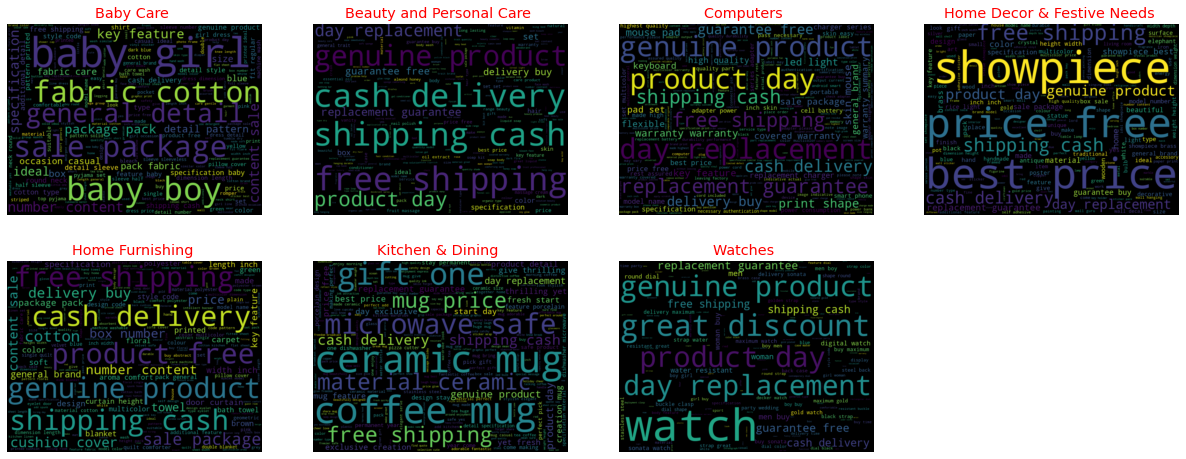

In [49]:
plt.figure(figsize=(21, 8))
for i, tup in enumerate(group_category, 1):
    n_topic, ser_texts = tup
    # creation of a corpus of all the cleaned descriptions and product_names
    corpus = ' '.join(ser_texts.values)
    # Instantiate a new wordcloud.
    wordcloud = WordCloud(width = 800, height= 600)
    wordcloud.generate(corpus)
    plt.subplot(2,4,i)
    # add interpolation = bilinear to smooth things out
    plt.imshow(wordcloud, interpolation='bilinear')
    # and remove the axis
    plt.axis("off")
    plt.title(n_topic, c='r')
plt.show()

In [50]:
# creation of a corpus of all the descriptions
original_corpus = ' '.join(data['description'].values)
print("total nb of words in the whole original corpus: ", len(original_corpus.split()))

total nb of words in the whole original corpus:  80013


In [51]:
# creation of a corpus of all the descriptions
corpus = ' '.join(data['description_clean'].values)
print("total nb of words in the whole corpus: ", len(corpus.split()))

total nb of words in the whole corpus:  48651


In [52]:
# Instantiate a new wordcloud.
wordcloud = WordCloud(width = 800, height= 600)
# Apply the wordcloud to the text.
wordcloud.generate(corpus)

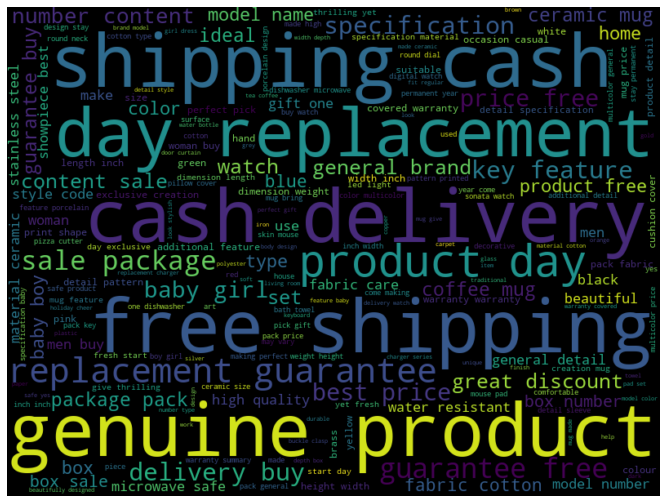

In [53]:
# create a figure
fig, ax = plt.subplots(1,1, figsize = (18, 9))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")
plt.show()

# <a name="C4">Fonctions communes: TSNE, Kmeans, ARI et présentation graphique</a>

In [54]:
import time

# Réduction dimensionnelle PCA et, 
# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégorie et n° de clusters
def ARI_fct(features, classifier = KMeans) :
    time1 = time.time()
    num_labels=len(l_cat)
    
    tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, 
                init='random', learning_rate=200, random_state=42)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = classifier(n_clusters=num_labels)
    cls.fit(X_tsne)
    ARI = np.round(adjusted_rand_score(y_cat_num, cls.labels_),4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, "time : ", time2)
    
    return ARI, X_tsne, cls.labels_


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(21, 9))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Categories")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)

# <a name="C5">BAG OF WORDS  --  TF-IDF</a>

##  <a name="C51">Préparation sentences</a> 

In [161]:
l_cat = list(set(data['product_category_level_1']))
print("catégories : ", l_cat)
y_cat_num = [(6-l_cat.index(data.iloc[i]['product_category_level_1'])) for i in range(len(data))]

catégories :  ['Home Decor & Festive Needs ', 'Baby Care ', 'Watches ', 'Kitchen & Dining ', 'Home Furnishing ', 'Computers ', 'Beauty and Personal Care ']


In [162]:
vectorizer_bow = CountVectorizer()
X_bow = vectorizer_bow.fit_transform(data['description_bow'])
X_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [163]:
X_bow.shape

(1050, 5892)

In [164]:
len(vectorizer_bow.get_feature_names())

5892

##  <a name="C52">Exécution du modèle</a>

In [165]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(X_bow)

CountVectorizer : 
-----------------
ARI :  0.3676 time :  6.0


##  <a name="C53">Visualisation</a>

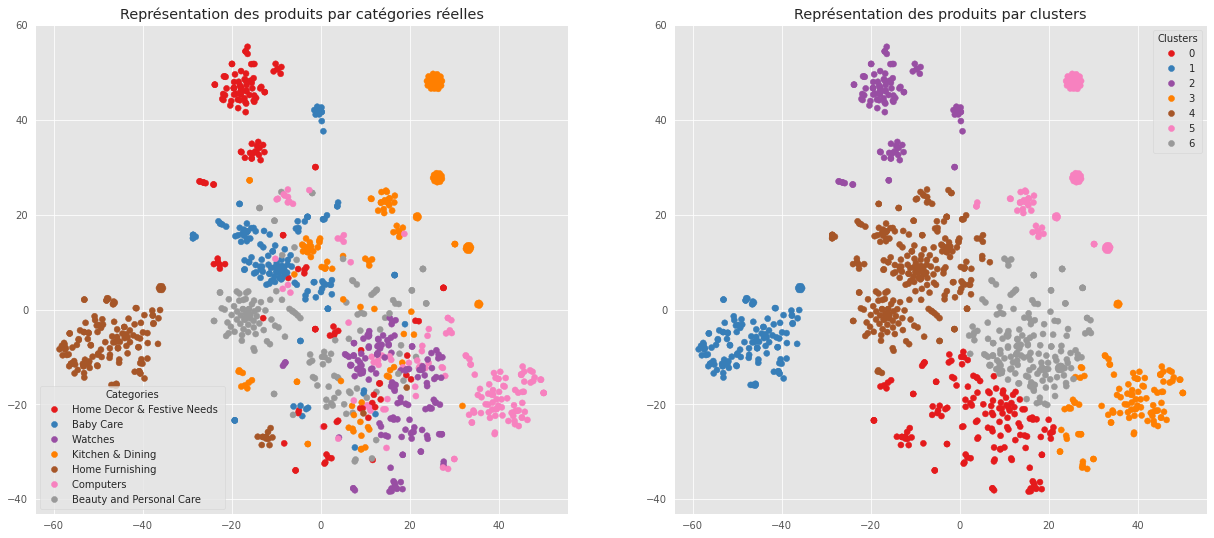

ARI :  0.3676


In [166]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

In [167]:
vectorizer_tfidf = TfidfVectorizer(max_df=0.95, min_df=1)
X_tfidf = vectorizer_tfidf.fit_transform(data['description_bow'])
X_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [168]:
X_tfidf.shape

(1050, 5892)

##  <a name="C52">Exécution du modèle</a>

In [170]:
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(X_tfidf)


Tf-idf : 
--------
ARI :  0.5025 time :  6.0


##  <a name="C53">Visualisation</a>

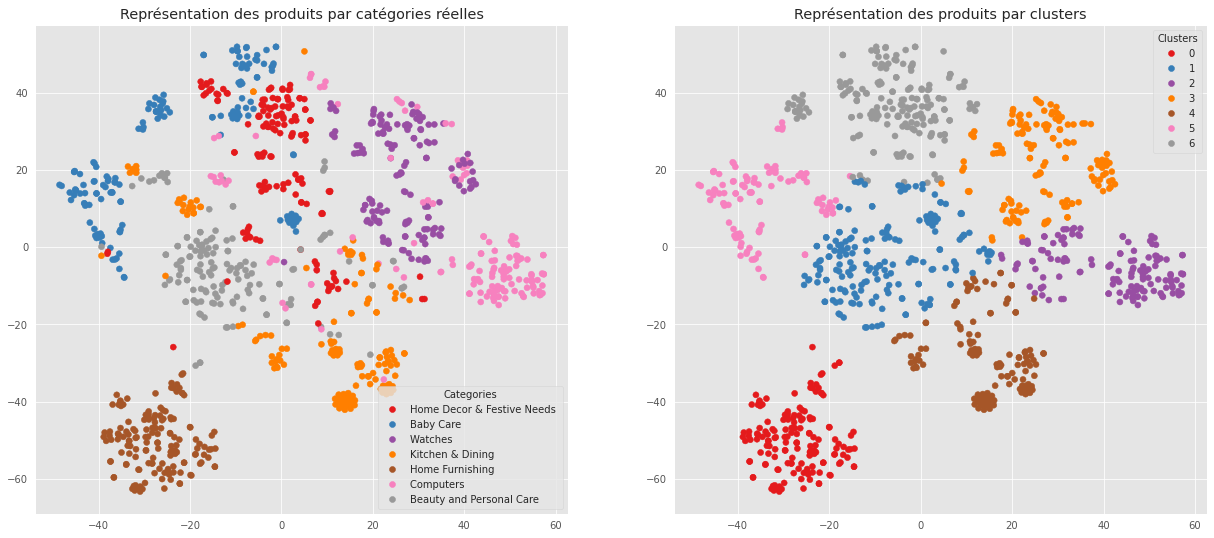

ARI :  0.5025


In [171]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# <a name="C6">WORD2VEC</a> 

##  <a name="C61">Setup</a> 

In [65]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

##  <a name="C62">Création du modèle Word2Vec</a>  

In [120]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = maxlen # adapt to length of sentences
sentences = data['description_bow'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [121]:
sentence_length = []
for i in range(1050):
    sentence_length.append(len(sentences[i]))
maxlen = max(sentence_length)
print(maxlen)

371


In [122]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)

w2v_model.build_vocab(sentences) # prepare the model vocabulary
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs) # train word vectors
model_vectors = w2v_model.wv  #mapping between words and embeddings. 
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 5098
Word2Vec trained


In [123]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 5099


##  <a name="C63">Création de la matrice d'embedding</a>

In [124]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print(vocab_size)
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
5099
Word embedding rate :  1.0
Embedding matrix: (5099, 300)


##  <a name="C64">Création du modèle d'embedding</a> 

In [125]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 371)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 371, 300)          1529700   
                                                                 
 global_average_pooling1d_4   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,529,700
Trainable params: 1,529,700
Non-trainable params: 0
_________________________________________________________________


##  <a name="C65">Exécution du modèle</a>  

In [126]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 889us/step


(1050, 300)

In [127]:
embeddings

array([[ 0.11970561, -0.00800525,  0.17786792, ..., -0.14952417,
        -0.01681946, -0.06806776],
       [ 0.09113014, -0.17920813,  0.02016662, ..., -0.02538705,
        -0.02752875,  0.10432608],
       [ 0.24483848, -0.20117188,  0.06544363, ..., -0.0882359 ,
        -0.08570709,  0.0809129 ],
       ...,
       [ 0.00535639,  0.03936693, -0.0173695 , ..., -0.01928944,
         0.01615358,  0.04869516],
       [ 0.01837163,  0.04272125, -0.01209505, ..., -0.01570971,
         0.01860806,  0.05066156],
       [ 0.00923507,  0.04800661, -0.01963703, ..., -0.02816659,
         0.01123734,  0.04472688]], dtype=float32)

In [128]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3277 time :  2.0


##  <a name="C66">Visualisation</a>  

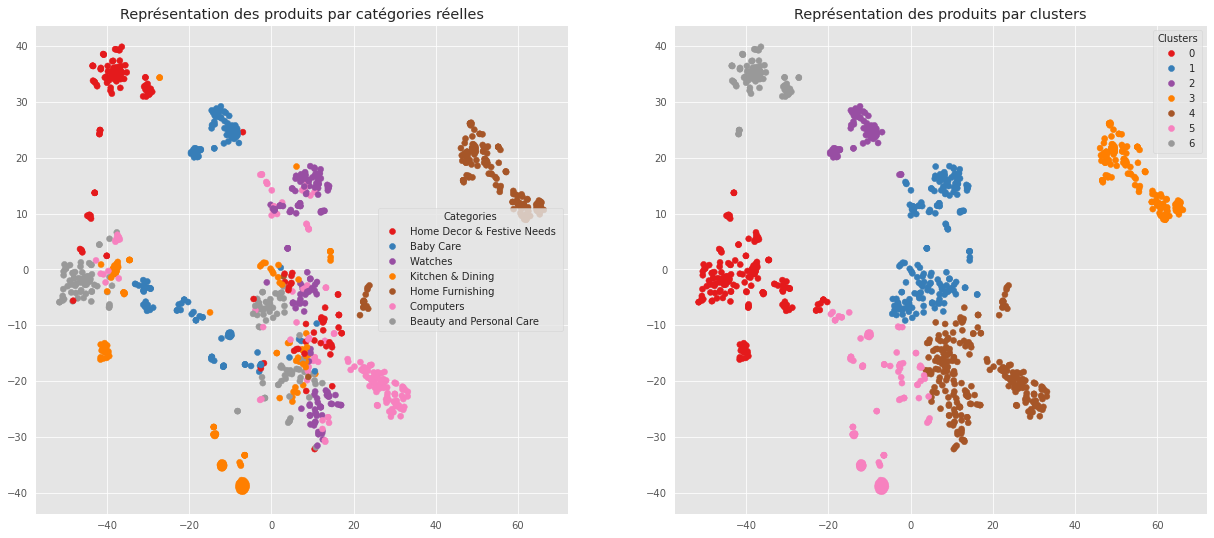

ARI :  0.3277


In [129]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# <a name="C7">GLOVE</a>

##  <a name="C71">Setup</a> 

In [109]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

##  <a name="C72">Création du modèle GloVe</a>  

In [140]:
embedding_size=300
maxlen = maxlen # adapt to length of sentences
sentences = data['description_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [141]:
sentence_length = []
for i in range(1050):
    sentence_length.append(len(sentences[i]))
maxlen = max(sentence_length)
print(maxlen)

371


In [142]:
# Télécharger le  modèle GloVe

embeddings_index = {}
f = open('glove.6B.300d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))
glv_words = embeddings_index.keys()
print("Vocabulary size: %i" % len(glv_words))


Found 400000 word vectors.
Vocabulary size: 400000


In [143]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


Here's a dict mapping words to their indices:

##  <a name="C73">Création de la matrice d'embedding</a>

In [144]:
print("Create Embedding matrix ...")
embedding_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
out_of_embedding=[]
print(vocab_size)
embedding_matrix_1 = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in glv_words:
        j +=1
        embedding_vector = embeddings_index[word]
        if embedding_vector is not None:
            embedding_matrix_1[idx] = embeddings_index[word]
    else:
        out_of_embedding.append(word)
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix_1.shape))
print("words out of embedding", out_of_embedding)

Create Embedding matrix ...
4713
Word embedding rate :  0.8708
Embedding matrix: (4713, 300)
words out of embedding ['flipkart', 'rockmantra', 'kadhai', 'smartpro', 'prithish', 'printland', 'lapguard', 'akup', 'dohar', 'oxyglow', 'magsafe', 'timewel', 'wallmantra', 'perucci', 'cotonex', 'mxofere', 'hako', 'cmgy', 'antiqueshop', 'furnishingland', 'polyresin', 'sapatos', 'wallskart', 'jacadi', 'aloevera', 'suitable_for', 'sunlast', 'tallenge', 'trimning', 'multicolour', 'sleepsuit', 'lmli', 'aapno', 'bharatcraft', 'beautifull', 'anodised', 'clublaptop', 'digilight', 'eurospa', 'rythmx', 'omic', 'metallino', 'dungaree', 'mossiac', 'requirment', 'volatege', 'idlis', 'giftsthatwow', 'cmly', 'nosww', 'attivo', 'lmgy', 'lpln', 'flippd', 'jeggings', 'ecraftindia', 'mixfruit', 'portronics', 'kliqvik', 'bhalaria', 'polyfill', 'cookart', 'diviniti', 'shopizone', 'shoppingtara', 'agromech', 'tiedribbons', 'trendnet', 'edimax', 'ygs', 'babyoye', 'varry', 'rrsskids', 'wonderchef', 'vrct', 'rrtc', 'w

##  <a name="C74">Création du modèle d'embedding</a> 

In [145]:
embedding_matrix_1.shape

(4713, 300)

In [146]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=embedding_size,
                         weights = [embedding_matrix_1],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model_1 = Model([word_input],word_vec)

embed_model_1.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 371)]             0         
                                                                 
 embedding_6 (Embedding)     (None, 371, 300)          1413900   
                                                                 
 global_average_pooling1d_6   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


##  <a name="C75">Exécution du modèle</a>  

In [147]:
embeddings = embed_model_1.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 874us/step


(1050, 300)

In [148]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.2703 time :  3.0


##  <a name="C76">Visualisation</a>  

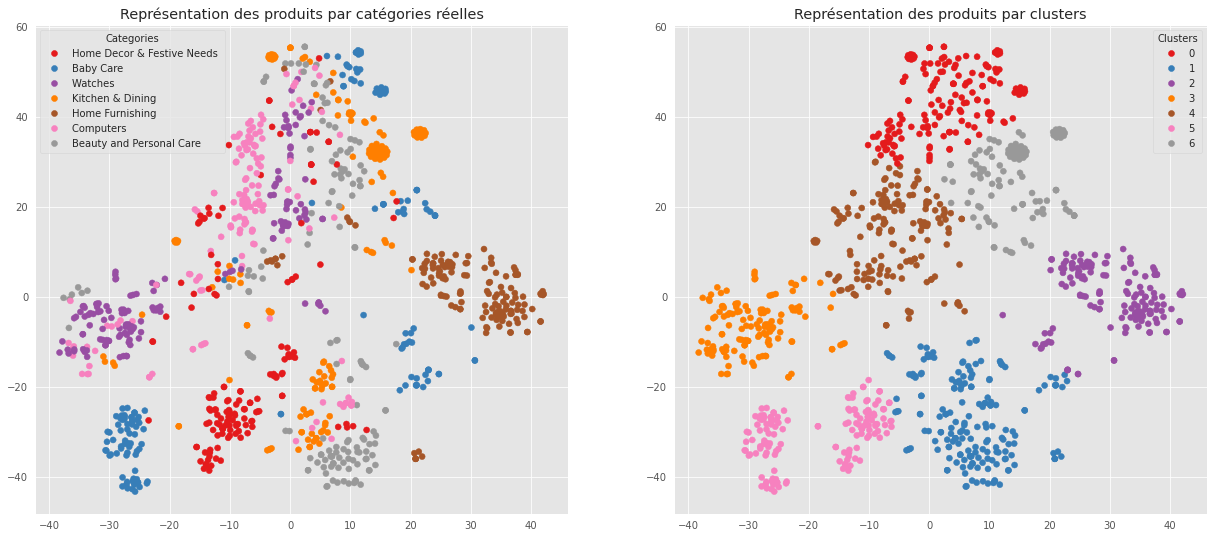

ARI :  0.2703


In [149]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# <a name="C8">BERT - Bidirectional Encoder Representations from Transformers</a> 

##  <a name="C81">Setup</a>

In [87]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
#from transformers import *

os.environ["TF_KERAS"]='1'

##  <a name="C82">Fonctions pour BERT</a>

In [88]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size) :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = transformers.AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
        last_hidden_states = outputs.last_hidden_state

        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

##  <a name="C83">Création et Exécution du modèle</a>

### BERT HuggingFace - 'bert-base-uncased'

In [89]:
max_length = 512
batch_size = 50
model_type = 'bert-base-uncased'
model = transformers.TFAutoModel.from_pretrained(model_type)
sentences = data['description_dl'].to_list()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [90]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size)

2022-07-18 11:05:04.912842: E tensorflow/core/framework/node_def_util.cc:630] NodeDef mentions attribute epsilon which is not in the op definition: Op<name=_MklFusedBatchMatMulV2; signature=x:T, y:T, args:num_args*T -> output:T; attr=T:type,allowed=[DT_BFLOAT16, DT_FLOAT]; attr=adj_x:bool,default=false; attr=adj_y:bool,default=false; attr=num_args:int,min=0; attr=fused_ops:list(string),default=[]> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node tf_bert_model/bert/encoder/layer_._0/attention/self/ArithmeticOptimizer/AddOpsRewrite_add_1}}


1/1 [==============================] - 15s 15s/step
temps traitement :  334.0


In [91]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.3006 time :  3.0


In [177]:
features_bert.shape

(1050, 768)

##  <a name="C84">Visualisation</a>

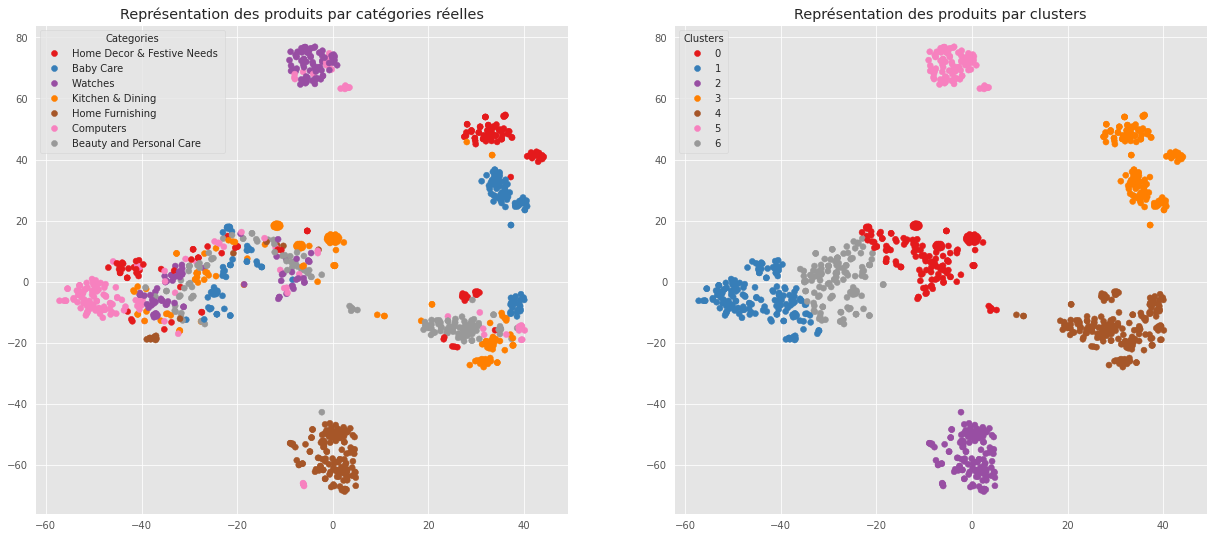

ARI :  0.3006


In [92]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# <a name="C9">USE - Universal Sentence Encoder</a>

##  <a name="C91">Création et Exécution du modèle</a>

In [93]:
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [94]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [95]:
batch_size = 10
sentences = data['description_dl'].to_list()

In [96]:
features_USE = feature_USE_fct(sentences, batch_size)

In [178]:
features_USE.shape

(1050, 512)

In [97]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.4384 time :  3.0


##  <a name="C92">Visualisation</a>

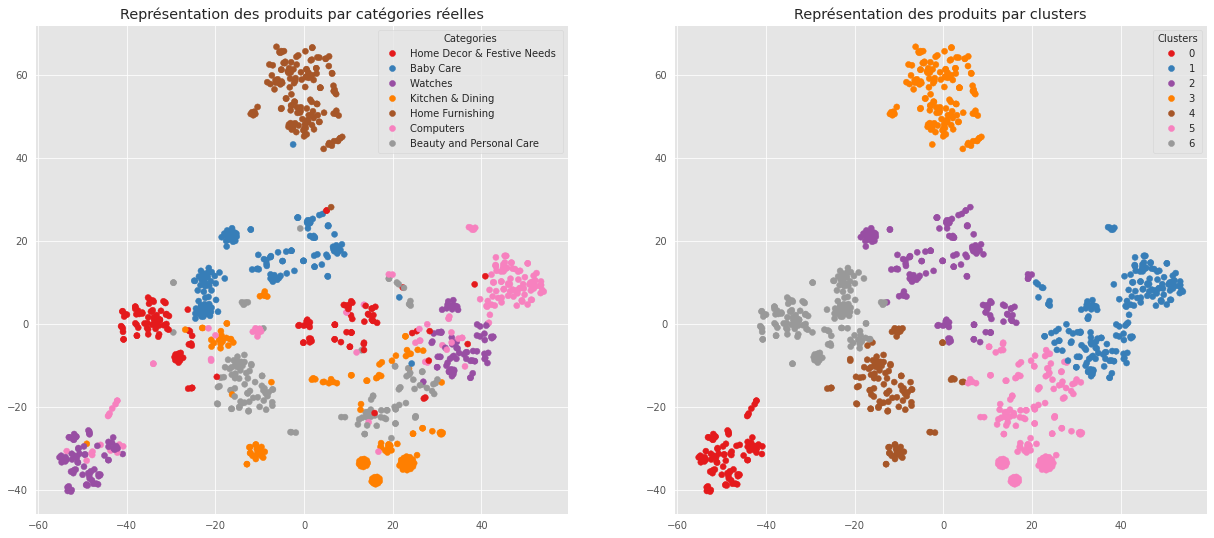

ARI :  0.4384


In [98]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Fin

# Transformers

In [151]:
from transformers import pipeline
classifier = pipeline('zero-shot-classification')
classifier(data['description'][1],
           candidate_labels=data['product_category_level_1'].unique().tolist(),
           multi_label=False
           )

No model was supplied, defaulted to roberta-large-mnli (https://huggingface.co/roberta-large-mnli)
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at roberta-large-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


{'sequence': 'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel',
 'labels': ['Home Furnishing ',
  'Beauty and Personal Care ',
  'Home Decor & Festive Needs ',
  'Kitchen & Dining ',
  'Baby Care ',
  'Watches ',
  'Computers '],
 'scores': [0.24085171520709991,
  0.2359386533498764,
  0.16554056107997894,
  0.14283517003059387,
  0.1022363230586052,
  0.05862414464354515,
  0.05397344380617142]}

In [157]:
from transformers import pipeline
from tqdm import tqdm

classifier = pipeline("zero-shot-classification",device = 0)


candidate_labels = list(data['product_category_level_1'].unique()) #candidate labels are basically the classes that the classifier will predict
predictedCategories = []
trueCategories = []
for i in tqdm(range(data.shape[0])):
    text = data.iloc[i,]['description']
    cat = data.iloc[i,]['product_category_level_1']
    res = classifier(text, candidate_labels, multi_label=True)#setting multi-class as True
    labels = res['labels'] 
    scores = res['scores'] #extracting the scores associated with the labels
    res_dict = {label : score for label,score in zip(labels, scores)}
    sorted_dict = dict(sorted(res_dict.items(), key=lambda x:x[1],reverse = True)) #sorting the dictionary of labels in descending order based on their score
    for i, (k,v) in enumerate(sorted_dict.items()):
        if(i > 0): #storing only the best 3 predictions
            break
        else:
            predictedCategories.append(k)
    trueCategories.append(cat)

No model was supplied, defaulted to roberta-large-mnli (https://huggingface.co/roberta-large-mnli)
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at roberta-large-mnli.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
100%|██████████| 1050/1050 [49:56<00:00,  2.85s/it] 


In [153]:
for y_true, y_pred in zip(trueCategories[:5], predictedCategories[:5]):
    print(f'True Categories {y_true}')
    print(f'Predicted Categories {y_pred}')
    print('#'*50)

True Categories Home Furnishing 
Predicted Categories Home Furnishing 
##################################################
True Categories Baby Care 
Predicted Categories Home Furnishing 
##################################################
True Categories Baby Care 
Predicted Categories Beauty and Personal Care 
##################################################
True Categories Home Furnishing 
Predicted Categories Home Furnishing 
##################################################
True Categories Home Furnishing 
Predicted Categories Home Furnishing 
##################################################


In [170]:
l_cat = list(set(data['product_category_level_1']))
print("catégories : ", l_cat)
trueCategories_num = [(6-l_cat.index(data.iloc[i]['true_categories'])) for i in range(len(data))]
predictedCategories_num = [(6-l_cat.index(data.iloc[i]['predicted_categories'])) for i in range(len(data))]

catégories :  ['Baby Care ', 'Home Decor & Festive Needs ', 'Kitchen & Dining ', 'Beauty and Personal Care ', 'Watches ', 'Computers ', 'Home Furnishing ']


In [173]:
    ARI = np.round(adjusted_rand_score(trueCategories_num, predictedCategories_num),4)
    print("ARI : ", ARI)


ARI :  0.3101
